In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
import psycopg2

conn = psycopg2.connect(database="solar",
						user="ai_guy",
						password="AcBel.26217672",
						host="10.10.171.136",
						port="52102")

In [2]:

# sql_param = \
# '''
# SELECT sl42.site_id, sl42.data_time, sl42.value_1 AS irradiance
# FROM sl42_irradiance sl42
# WHERE sl42.site_id = 77
# 	AND sl42.data_time 
# 		BETWEEN %(startDT)s AND %(endDT)s
# ORDER BY sl42.data_time ASC
# '''
sql_param = \
'''
SELECT sl40.site_id, sl40.device_id, 
	sl40.data_time,
	sl40.in_current->'0' AS in_current_0,
	sl40.in_current->'1' AS in_current_1,
	sl40.in_current->'2' AS in_current_2,
	sl40.in_current->'3' AS in_current_3,
	sl40.in_current->'4' AS in_current_4,
	sl40.in_current->'5' AS in_current_5,
	sl40.in_current->'6' AS in_current_6,
	sl40.in_current->'7' AS in_current_7,
	sl40.in_current->'8' AS in_current_8,
	sl40.in_voltage->'0' AS in_voltage_0,
	sl40.in_voltage->'1' AS in_voltage_1,
	sl40.in_voltage->'2' AS in_voltage_2,
	sl40.in_voltage->'3' AS in_voltage_3,
	sl40.in_voltage->'4' AS in_voltage_4,
	sl40.in_voltage->'5' AS in_voltage_5,
	sl40.in_voltage->'6' AS in_voltage_6,
	sl40.in_voltage->'7' AS in_voltage_7,
	sl40.in_voltage->'8' AS in_voltage_8,
	error_code->'ErrCodeE' AS err_code_e,
	error_code->'ErrCodeF' AS err_code_f,
	error_code->'ErrCodeG' AS err_code_g,
	error_code->'ErrCodeH' AS err_code_h,
	error_code->'WCode1' AS wcode_1,
	error_code->'WCode2' AS wcode_2,
	error_code->'WCode3' AS wcode_3,
	error_code->'FCode1' AS fcode_1,
	error_code->'FCode2' AS fcode_2,
	error_code->'FCode3' AS fcode_3,
	error_code->'FCode4' AS fcode_4,
	error_code->'FCode5' AS fcode_5,
	sl40.out_power,
	sl42.value_1 AS irradiance
FROM sl40_inverter sl40
LEFT JOIN sl42_irradiance sl42 
	ON sl40.site_id = sl42.site_id  
		AND sl40.data_time = sl42.data_time
WHERE sl40.site_id = %(site_id)s
	AND sl40.device_id = %(device_id)s
	AND sl40.data_time 
		BETWEEN %(startDT)s AND %(endDT)s
ORDER BY sl40.data_time ASC
'''

In [35]:

site_id = 77
device_id = 246
year = 2021
month = 8 
date = 12

df_db = pd.read_sql_query(	sql_param,
							con = conn,
							params={'site_id':site_id,
									'device_id':device_id,
									'startDT':datetime(year, month, date, 0, 0, 0),
									'endDT':datetime(year, month, date, 23, 59, 59)},
							parse_dates = {'data_time':{'format':'%Y-%m-%d %H:%M:%S:%f'}},
							index_col = ['data_time'])

df_db = df_db.dropna(axis = 'columns', how = 'all')
df_db

,site_id,device_id,in_current_1,in_current_2,in_voltage_1,in_voltage_2,err_code_e,out_power,irradiance
data_time,,,,,,,,,
2021-08-12 05:24:00+08:00,77,246,0.0,0.0,448.6,449.0,0,0.0,0.0
2021-08-12 05:26:00+08:00,77,246,0.0,0.0,537.1,537.8,0,0.0,1.0
2021-08-12 05:28:00+08:00,77,246,0.0,0.0,50.0,493.1,0,0.0,1.0
2021-08-12 05:30:00+08:00,77,246,0.0,0.0,567.7,568.7,0,0.0,1.0
2021-08-12 05:32:00+08:00,77,246,0.0,0.0,580.6,17.3,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
2021-08-12 18:28:00+08:00,77,246,0.3,0.4,537.1,520.3,0,84.0,2.0
2021-08-12 18:30:00+08:00,77,246,0.3,0.3,594.9,504.6,0,7.0,1.0
2021-08-12 18:32:00+08:00,77,246,0.0,0.0,540.6,541.2,0,0.0,0.0


In [ ]:

import seaborn as sns

# plt.figure()
# sns.heatmap(df_db[['in_current_1', 'in_current_2', 'in_voltage_1', 'in_voltage_2', 'out_power', 'irradiance', 'radiation']].corr(),
# 			vmin = -1, 
# 			vmax = 1, 
# 			annot = True,
# 			cmap='Blues')
# df_db.to_csv('tmp.csv')

# df_db.loc[('2021-05-04 05:00:00+08:00', 145), ['site_id', 'in_current_1']]

rmse: 1162.1068108697195
r2: 0.9827991444721333
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------


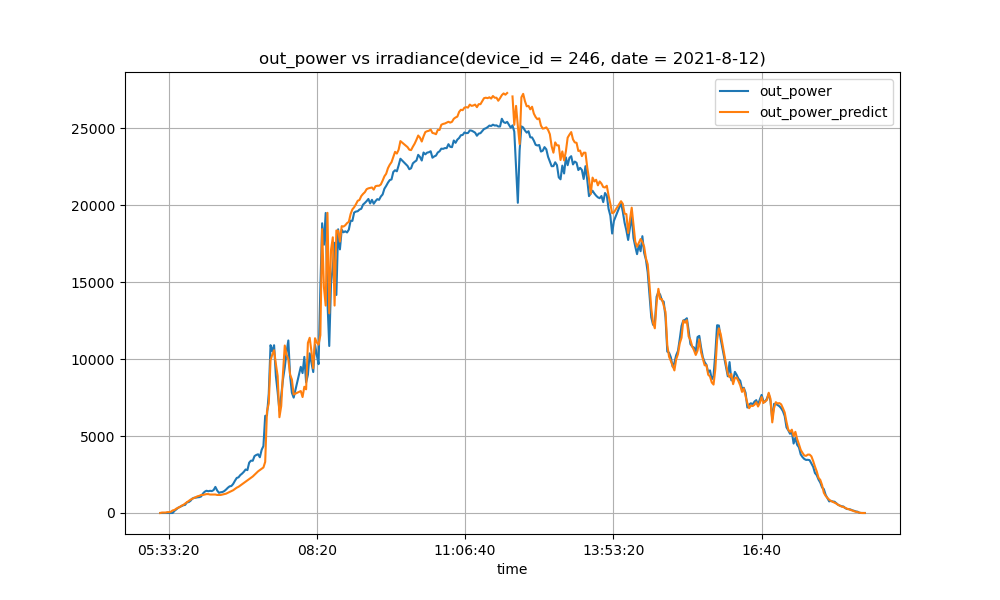

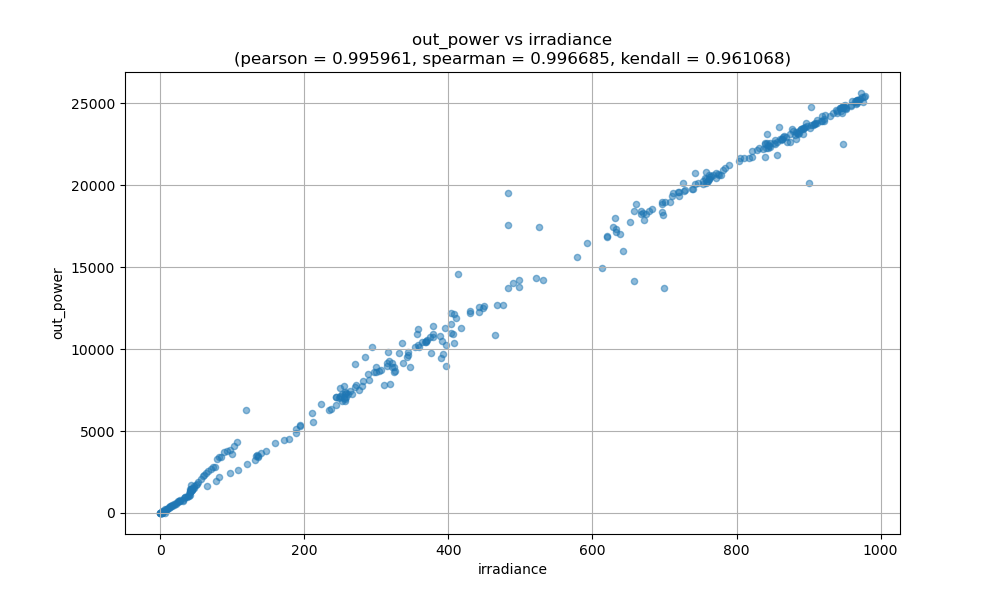

In [36]:

%matplotlib widget


df_copy = df_db.copy()
df_copy.index = df_copy.index.tz_convert('Asia/Taipei').tz_localize(None).time

df_copy['out_power'].plot(	figsize = (10, 6), 
							legend = True, 
                            grid=True,
							title = f'out_power vs irradiance(device_id = {device_id}, date = {year}-{month}-{date})')

df_copy['out_power_predict']  = df_copy['irradiance'] * 27.9
df_copy['out_power_predict'].plot(legend = True, grid=True)
# df_copy['irradiance'].plot(	secondary_y = True, 
# 							legend = True, 
# 							alpha = 0.7,
# 							style = '--',
# 							grid = True)

rmse = np.sqrt(mean_squared_error(  df_copy['out_power'].fillna(method='ffill'), 
                                    df_copy['out_power_predict'].fillna(method='ffill')))
r2 = r2_score(  df_copy['out_power'].fillna(method='ffill'), 
                df_copy['out_power_predict'].fillna(method='ffill'))

print('rmse:', rmse)
print('r2:', r2)

print('-'*56)

pearson = df_copy[['out_power', 'irradiance']].corr('pearson').loc['irradiance', 'out_power']
spearman = df_copy[['out_power', 'irradiance']].corr('spearman').loc['irradiance', 'out_power']
kendall = df_copy[['out_power', 'irradiance']].corr('kendall').loc['irradiance', 'out_power']
df_copy.plot.scatter(	figsize = (10, 6),
						x = 'irradiance', 
						y = 'out_power', 
						alpha = 0.5, 
						grid = True,
						title = f'out_power vs irradiance\n(pearson = {pearson:2f}, spearman = {spearman:2f}, kendall = {kendall:2f})')
# pd.plotting.scatter_matrix(df_copy[['out_power', 'irradiance']], alpha = 0.5)

print('-'*56)
# df_copy['in_current_1'].plot(figsize = (10, 6), legend = True, grid = True)
# df_copy['out_power'].plot(secondary_y = True, legend = True, grid = True, style = '--', alpha = 0.7)
# df_copy['in_current_2'].plot(figure = plt.figure(), figsize = (10, 6), legend = True, grid = True)
# df_copy[['in_voltage_1', 'in_voltage_2']].plot(secondary_y = True, legend = True, grid = True)
# df_copy[['in_voltage_1', 'in_voltage_2']].plot(figsize = (10, 6), legend = True, grid = True)

print('-'*56)
# df_copy['err_code_e'].plot(figure = plt.figure(), ylabel = 'err_code_e', grid = True)